source: https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cab_df = pd.read_csv('cab_rides.csv')
cab_df.head(6)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black


In [8]:
cab_df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


There is a lot of data points here. I find it interesting that the max price is only $97.50 as when I was in New York we took Ubers around and we heard stories of people doing trips to other states with trips costing hundreds. Though this might just be simulated data, so it more than likely excluded those extreme outliers.

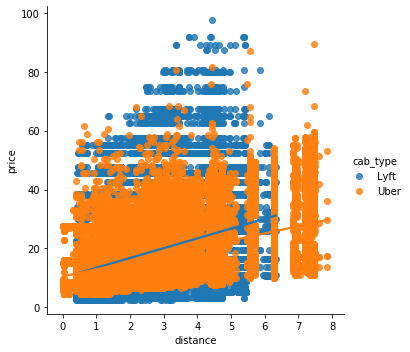

In [4]:
sns.lmplot(x = 'distance', y = 'price', data = cab_df, hue = 'cab_type')

Though it is difficult to see, on average, as distance increases the cost of a ride increases more with lyft than with uber.

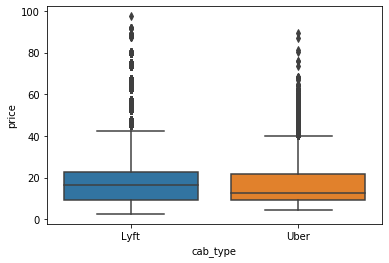

In [9]:
sns.boxplot(x = 'cab_type', y = 'price', data = cab_df)

Although slight, we can see that the median price for uber is cheaper than with lyft, there is also less price variability with uber than with lyft.

I'm curious about the different products each company offers and the mean price of each.

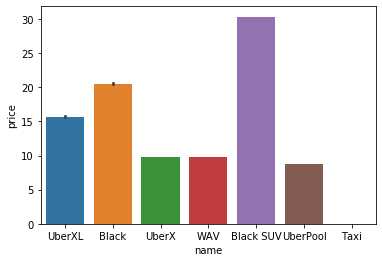

In [33]:
sns.barplot(x = cab_df[cab_df['cab_type'] == 'Uber']['name'], y = cab_df["price"])

Bar plot is not the best visualization as we we only get the mean or median of each services price. A boxplot may give us a better understanding. Find it odd Taxi doesn't have any price data, though this is due to the fact that this is a service to simply call taxis through the uber app rather than driving with uber drivers.

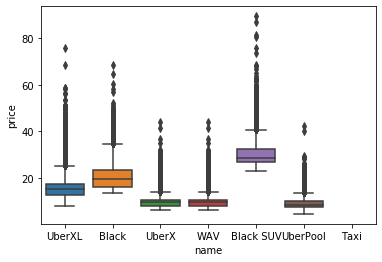

In [34]:
sns.boxplot(x = cab_df[cab_df['cab_type'] == 'Uber']['name'], y = cab_df["price"])

That's better, let's look at Lyft.

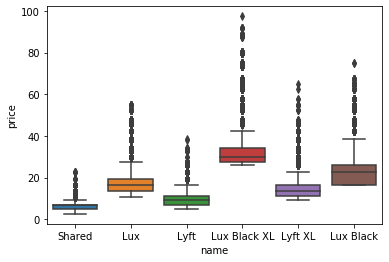

In [74]:
sns.boxplot(x = cab_df[cab_df['cab_type'] == 'Lyft']['name'], y = cab_df["price"])

Just from eyeing the data, it seems it actually may be advantagous to ride with lyft if you are willing to carpool with other passengers via Shared with Lyft than UberPool with Uber as it is cheaper. Let's get a better look.

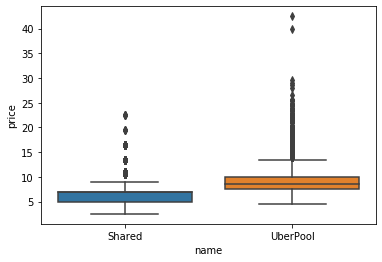

In [83]:
carpool = pd.concat([cab_df[cab_df['name'] == 'Shared'], cab_df[cab_df['name'] == 'UberPool']]) 
sns.boxplot(x = 'name', y = 'price', data = carpool)

I was correct that Lyft's carpooling service is cheaper than Uber's.

source: https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019

In [11]:
spotify_df = pd.read_csv('spotify.csv')
spotify_df.head(6)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010.0,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010.0,Solo


title = Song's Title <br>
artist = Song's artist <br>
genre = Genre of song <br>
year released = Year the song was released <br>
added = Day song was added to Spotify's Top Hits playlist <br>
bpm = Beats Per Minute - The tempo of the song <br>
nrgy = Energy - How energetic the song is <br>
dnce = Danceability - How easy it is to dance to the song <br>
dB = Decibel - How loud the song is <br>
live = How likely the song is a live recording <br>
val = How positive the mood of the song is <br>
dur = Duration of the song <br>
acous = How acoustic the song is <br>
spch = The more the song is focused on spoken word <br>
pop = Popularity of the song (not a ranking) <br>
top year = Year the song was a top hit <br>
artist type = Tells if artist is solo, duo, trio, or a band 

Figured there was many variables that were unclear, so I decided to include a reference. Though, I suspect that many of these variables aren't objective data points (ie: acous, dnce).

In [12]:
spotify_df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


Doesn't look like there is any missing data points, which is nice. I'm interested by the fact that at least one of the Top 100 songs of some year released in 1975, as we can see under the column year released's minimum value. If I were to wager why, it would be due to a meme. I'll promptly find out. I don't know why the column dB is only compromised of negative values, that's somewhat annoying that a variable that very well could hold objective values doesn't. It is also concerning that the max year released is 2021, despite this being a dataset covering the top 100 songs on spotify from 2010 to 2019, though the data was compiled March 20, 2021.

In [16]:
spotify_df['year released']

0       2009.0
1       2010.0
2       2010.0
3       2010.0
4       2010.0
         ...  
998     2019.0
999     2019.0
1000       NaN
1001       NaN
1002       NaN
Name: year released, Length: 1003, dtype: float64

So it seems there may be missing data points?? I guess we'll find out

In [18]:
spotify_df[spotify_df['year released'] == 1975]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975.0,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019.0,Band/Group


So it would seem the song from 1975 is Bohemian Rhapsody by: Queen. Classic! The year it made the top 100 list was 2019. The reasoning for this is likely due to the release of the Bohemian Rhapsody movie in late 2018 (November in the United States) that was a biographical film about Freddie Mercury. Now I'm interested to see if there are any other songs that were released before the 2010s 

In [19]:
spotify_df[spotify_df['year released'] >= 2020]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
69,Eenie Meenie,Sean Kingston,dance pop,2020.0,2022‑02‑17,121.0,64.0,73.0,-3.0,10.0,84.0,202.0,3.0,3.0,72.0,2010.0,Solo
98,We No Speak Americano (Edit),Yolanda Be Cool,australian dance,2020.0,2022‑02‑17,125.0,81.0,90.0,-5.0,9.0,75.0,157.0,7.0,5.0,65.0,2010.0,Duo
168,I Follow Rivers - The Magician Remix,Lykke Li,art pop,2021.0,2020‑06‑25,122.0,70.0,79.0,-6.0,8.0,30.0,280.0,2.0,4.0,67.0,2011.0,Solo
182,Read All About It,Professor Green,grime,2021.0,2020‑06‑16,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0,2011.0,Solo
608,Hurts So Good,Astrid S,alt z,2021.0,2020‑06‑08,120.0,63.0,67.0,-5.0,9.0,42.0,209.0,8.0,5.0,77.0,2016.0,Solo
651,Gold,Kiiara,alt z,2020.0,2020‑06‑08,113.0,41.0,60.0,-9.0,13.0,41.0,226.0,62.0,34.0,64.0,2016.0,Solo
901,Easier,5 Seconds of Summer,boy band,2020.0,2020‑06‑22,176.0,46.0,56.0,-4.0,11.0,62.0,158.0,48.0,26.0,74.0,2019.0,Band/Group
951,i'm so tired...,Lauv,dance pop,2020.0,2020‑06‑22,102.0,73.0,60.0,-7.0,24.0,53.0,163.0,18.0,20.0,81.0,2019.0,Solo
972,Options,NSG,afro dancehall,2020.0,2020‑08‑20,102.0,62.0,84.0,-5.0,10.0,76.0,240.0,39.0,9.0,62.0,2019.0,Band/Group


So it would seem that these year of release entries greater than 2019 are merely data entry errors.

In [21]:
spotify_df[spotify_df['year released'] < 2010]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
7,Imma Be,Black Eyed Peas,dance pop,2009.0,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010.0,Band/Group
13,Memories (feat. Kid Cudi),David Guetta,big room,2009.0,2022‑02‑17,130.0,87.0,56.0,-6.0,25.0,50.0,210.0,0.0,34.0,74.0,2010.0,Solo
14,Gettin' Over You (feat. Fergie & LMFAO),David Guetta,big room,2009.0,2022‑02‑17,130.0,91.0,62.0,-5.0,8.0,45.0,188.0,18.0,8.0,55.0,2010.0,Solo
29,Replay,Iyaz,dance pop,2009.0,2022‑02‑17,91.0,75.0,71.0,-6.0,17.0,20.0,182.0,17.0,7.0,78.0,2010.0,Solo
33,Down,Jay Sean,dance pop,2009.0,2022‑02‑17,132.0,68.0,73.0,-4.0,8.0,73.0,213.0,1.0,3.0,83.0,2010.0,Solo
34,Do You Remember,Jay Sean,dance pop,2009.0,2022‑02‑17,126.0,67.0,85.0,-5.0,10.0,82.0,211.0,2.0,7.0,74.0,2010.0,Solo
35,Young Forever,JAY-Z,east coast hip hop,2009.0,2022‑02‑17,140.0,69.0,64.0,-3.0,21.0,10.0,254.0,42.0,7.0,71.0,2010.0,Solo
36,Heartbreak Warfare,John Mayer,neo mellow,2009.0,2022‑02‑17,97.0,55.0,62.0,-8.0,30.0,31.0,270.0,19.0,2.0,69.0,2010.0,Solo
37,Half of My Heart,John Mayer,neo mellow,2009.0,2022‑02‑17,115.0,59.0,68.0,-9.0,11.0,73.0,250.0,44.0,3.0,68.0,2010.0,Solo


In trying to see if there were any songs other than Bohemian Rhapsody that were released much earlier than the year they were in the top 100 songs, it would seem that the only other songs before the 2010s are from 2009 which simply continued in popularity into 2010, which is not all that extravagant of a finding.

Let's see the top 10 most popular artists.

In [83]:
spotify_df['artist'].value_counts()[0:11]

Taylor Swift     21
Drake            18
Calvin Harris    18
Ariana Grande    14
Rihanna          14
Bruno Mars       13
Maroon 5         11
Chris Brown      10
Post Malone      10
Ed Sheeran       10
Jason Derulo     10
Name: artist, dtype: int64

These are the artists that dominated the music of the 2010s. I was going to include merely the top 10, but there were multiple artists with 10 songs. Surprised not to see Justin Bieber.

Let's see the distribution of the bpm to find the bpm that may be the most likely to get you in the top 100.

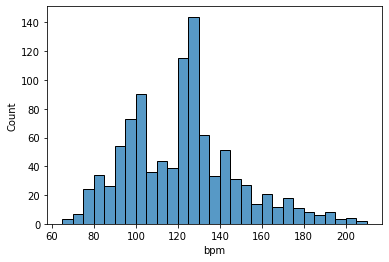

In [42]:
sns.histplot(spotify_df['bpm'], binwidth = 5)

It seems as though songs with a bpm between 120 and 130 are the most popular, though there are songs with bpm between 95 and 105 that are also quite popular. I'm sure there are similar clusters for something such as duration of songs.

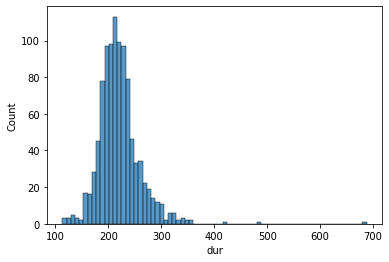

In [43]:
sns.histplot(spotify_df['dur'])

The duration of the songs has more of a normal distribution with an evident bell curve. The songs' duration is measured in seconds. The mean being 220.406000, or 3 minutes 40 secs, from our description of the data above. Let's plot the mean on the graph, while also getting a view more centralized on the bell curve rather than the outliers.

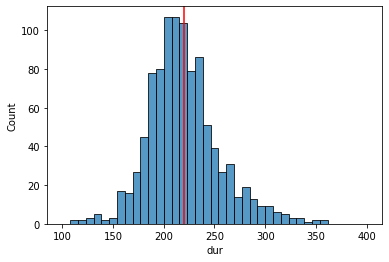

In [58]:
sns.histplot(spotify_df['dur'], binrange = (100, 400))
plt.axvline(x=spotify_df.dur.mean(),
            color='red')

We can see that between approx. 200 seconds and 225 seonds is the sweet spot for duration.

What genres are the most popular?

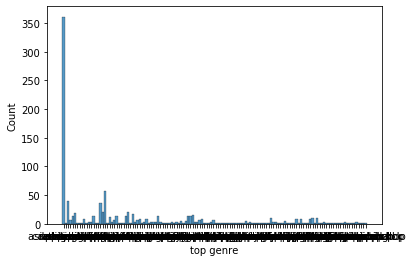

In [63]:
sns.histplot(spotify_df['top genre'])

So tons of genres, with one dominating the rest by far, my guess, pop. So we'll extract the top 10.

In [77]:
spotify_df['top genre'].value_counts()[0:12]

dance pop               361
pop                      57
atl hip hop              39
art pop                  37
hip hop                  21
boy band                 21
canadian hip hop         18
edm                      17
folk-pop                 15
conscious hip hop        14
barbadian pop            14
contemporary country     14
Name: top genre, dtype: int64

Again we have a there are multiple genres that have a count of 14. I have no idea what "art pop" is. But it would seem that pop and hip hop are the two common genres to make the top 100 with emphasis on pop. I find it funny that Canadian hip hop is seperate genre, it has a count of 18, just as Drake did when looking at top artists, I'm curious whether Canadian hip hop is just Drake.

In [81]:
spotify_df[spotify_df['top genre'] == 'canadian hip hop']

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
16,Over,Drake,canadian hip hop,2010.0,2022‑02‑17,100.0,85.0,35.0,-6.0,12.0,45.0,234.0,1.0,20.0,72.0,2010.0,Solo
17,Find Your Love,Drake,canadian hip hop,2010.0,2022‑02‑17,96.0,61.0,63.0,-6.0,3.0,76.0,209.0,2.0,17.0,70.0,2010.0,Solo
132,Headlines,Drake,canadian hip hop,2011.0,2020‑06‑16,152.0,57.0,64.0,-7.0,9.0,43.0,236.0,37.0,11.0,80.0,2011.0,Solo
226,Take Care,Drake,canadian hip hop,2011.0,2020‑06‑22,122.0,52.0,63.0,-10.0,9.0,30.0,277.0,3.0,27.0,81.0,2012.0,Solo
227,The Motto,Drake,canadian hip hop,2011.0,2020‑06‑22,202.0,44.0,77.0,-9.0,11.0,39.0,182.0,0.0,36.0,79.0,2012.0,Solo
333,"Hold On, We're Going Home",Drake,canadian hip hop,2013.0,2020‑06‑11,100.0,41.0,78.0,-7.0,7.0,29.0,228.0,0.0,9.0,76.0,2013.0,Solo
334,Started From the Bottom,Drake,canadian hip hop,2013.0,2020‑06‑11,86.0,52.0,79.0,-8.0,16.0,58.0,174.0,3.0,16.0,71.0,2013.0,Solo
518,Hotline Bling,Drake,canadian hip hop,2016.0,2020‑06‑19,135.0,63.0,89.0,-8.0,5.0,55.0,267.0,0.0,6.0,82.0,2015.0,Solo
519,Jumpman,Drake,canadian hip hop,2015.0,2020‑06‑19,142.0,55.0,85.0,-7.0,33.0,66.0,206.0,6.0,19.0,76.0,2015.0,Solo
630,Too Good,Drake,canadian hip hop,2016.0,2020‑06‑08,118.0,65.0,79.0,-8.0,10.0,40.0,263.0,5.0,10.0,78.0,2016.0,Solo


Sure enough it's just Drake.

With dance pop being the top genre, I'm curious if having more or less spoken word (spch) has an effect on whether a song makes the top 100.

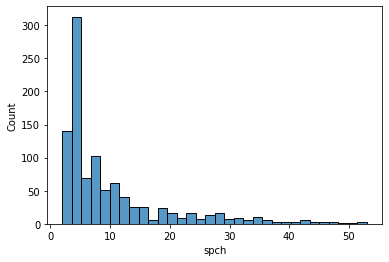

In [84]:
sns.histplot(spotify_df['spch'])

Seem as though less is more. 